Download Test results of other competing models on R100H and R100L dataset (https://github.com/kuijiang94/MSPFN)


In [1]:
# !wget "https://hkustconnect-my.sharepoint.com/:u:/g/personal/nnanda_connect_ust_hk/EU6cmienC4VDtxTBde992fkB0wrfcmF3fulOftKRUu8gzg?download=1" -O "R100.rar"
# !unrar x 'R100.rar' -idq

Download the commonly used test rain datasets - R100H, R100L, TEST100, TEST1200, TEST2800 (https://github.com/kuijiang94/MSPFN)

In [2]:
# !wget "https://hkustconnect-my.sharepoint.com/:u:/g/personal/nnanda_connect_ust_hk/EV4S00qm0Z1Kg2cY1RYlqisBduHynVyigG0hnHTU4hOWEw?download=1" -O "testimage.rar"
# !unrar x 'testimage.rar' -idq

# Data from Restormer Paper
* [Description of Data](https://drive.google.com/file/d/1oKGON8vG4uDWMmZKqHeTMnFowhOubifK/view)

Download Train data

In [3]:
!wget "https://hkustconnect-my.sharepoint.com/:u:/g/personal/nnanda_connect_ust_hk/EbZZwyV3WLJMk_rSHHYxN14BrDWSsnIpIXw56ftTCD_ieg?download=1" -O "train.zip"
!unzip -q train.zip

--2022-03-29 03:17:37--  https://hkustconnect-my.sharepoint.com/:u:/g/personal/nnanda_connect_ust_hk/EbZZwyV3WLJMk_rSHHYxN14BrDWSsnIpIXw56ftTCD_ieg?download=1
Resolving hkustconnect-my.sharepoint.com (hkustconnect-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to hkustconnect-my.sharepoint.com (hkustconnect-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/nnanda_connect_ust_hk/Documents/DL/train.zip?ga=1 [following]
--2022-03-29 03:17:38--  https://hkustconnect-my.sharepoint.com/personal/nnanda_connect_ust_hk/Documents/DL/train.zip?ga=1
Reusing existing connection to hkustconnect-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1163440376 (1.1G) [application/x-zip-compressed]
Saving to: ‘train.zip’

train.zip           100%[===================>]   1.08G  30.8MB/s    in 35s     

2022-03-29 03:18:13 (31.9 MB/s) - ‘train.zip’ saved [1163440376/1163440376]

train/Rain13K/input

Download Test data

In [4]:
!wget "https://hkustconnect-my.sharepoint.com/:u:/g/personal/nnanda_connect_ust_hk/EY3EbMx3FL9FoLlstrD6xrkBHur6fU6You3ppuqg_SOUDQ?download=1" -O "test.zip"
!unzip -q test.zip

--2022-03-29 03:18:25--  https://hkustconnect-my.sharepoint.com/:u:/g/personal/nnanda_connect_ust_hk/EY3EbMx3FL9FoLlstrD6xrkBHur6fU6You3ppuqg_SOUDQ?download=1
Resolving hkustconnect-my.sharepoint.com (hkustconnect-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to hkustconnect-my.sharepoint.com (hkustconnect-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/nnanda_connect_ust_hk/Documents/DL/test.zip?ga=1 [following]
--2022-03-29 03:18:26--  https://hkustconnect-my.sharepoint.com/personal/nnanda_connect_ust_hk/Documents/DL/test.zip?ga=1
Reusing existing connection to hkustconnect-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1360310555 (1.3G) [application/x-zip-compressed]
Saving to: ‘test.zip’

test.zip            100%[===================>]   1.27G  27.2MB/s    in 33s     

2022-03-29 03:19:00 (38.8 MB/s) - ‘test.zip’ saved [1360310555/1360310555]



In [5]:
import os
import torch
import torch.nn as nn
import numpy as np

from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T

import pandas as pd
from torchvision.io import read_image
from torchvision.transforms import ToTensor
from torchvision import transforms

import matplotlib.pyplot as plt

In [6]:
class RainImageDataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.target_transform = target_transform

        self.images = self.get_image_list(self.img_dir)

    def get_image_list(self, img_dir):
        images = []
        for file in os.listdir(img_dir):
            if '.jpg' in file or '.png' in file:
                images.append(file)
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.images[idx])
        image = read_image(img_path)
        label_path = os.path.join(self.label_dir, self.images[idx])
        label = read_image(label_path)
        # label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [7]:
training_data = RainImageDataset(
    img_dir="train/Rain13K/input",
    label_dir="/content/train/Rain13K/target",
    transform=transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()]),
    target_transform=transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
)

In [8]:
training_data.__len__()

13711

In [9]:
img, label = training_data.__getitem__(13710)
img.shape, label.shape

(torch.Size([3, 384, 512]), torch.Size([3, 384, 512]))

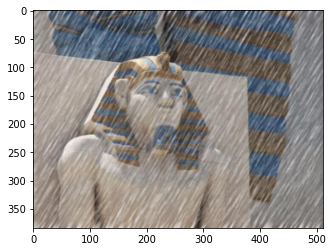

In [10]:
plt.imshow(img.permute(1, 2, 0))

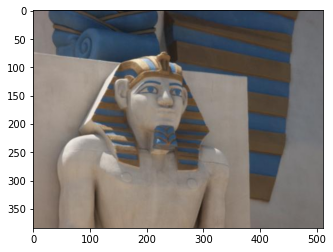

In [11]:
plt.imshow(label.permute(1, 2, 0))

Rain 100H

In [12]:
testing_data = RainImageDataset(
    img_dir="test/Rain100H/input",
    label_dir="test/Rain100H/target",
    transform=transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()]),
    target_transform=transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
)

In [13]:
testing_data.__len__()

100

In [14]:
img, label = training_data.__getitem__(1)
img.shape, label.shape

(torch.Size([3, 480, 640]), torch.Size([3, 480, 640]))

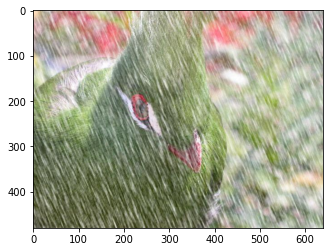

In [15]:
plt.imshow(img.permute(1, 2, 0))

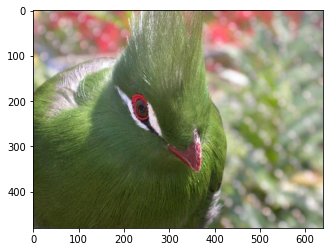

In [16]:
plt.imshow(label.permute(1, 2, 0))